Hi all !<br> This is my THIRD Kernel but for me the most experience gaining one....
I hope, it will be able to make the **Beginners** of **DATA SCIENCE** comfortable with small dataset and they can learn to apply different **Machine Learning** algorithms on **Regression** problem.

**<font size="4">Importing Libraries</font>**

In [1]:
import numpy as np
# Scientific computing library
import pandas as pd 
# DataFrame dealing Library
import seaborn as sns
# Graphical/Plotting Library
import matplotlib.pyplot as plt
# Graphical/Plotting Library
%matplotlib inline

**<font size="4">Reading Dataset</font>**

In [2]:
data=pd.read_csv("../input/Admission_Predict_Ver1.1.csv")
data.head()
# First 5 rows of the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<font size="4">From the above table, we can derive one easy thing......Think what will be that ????<br></font>
**<font size="4">Answer</font>**<font size="4"> - No need of 1st Column, i.e, Serial No.</font>

**<font size="4">Dropping Column/s</font>**

In [3]:
new_data=data.drop('Serial No.',axis=1)
# above one is 1st way
# new_data=data.iloc[:,1:9] <-- Skip 1st column, this is 2nd way
new_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**<font size="4">Describe</font>**<font size="4"> is used to see the </font>*<font size="4"> STATISTICS</font>*<font size="4"> of the data </font>

In [4]:
new_data.describe()
# You can see "mean" of everything and that will be shown in countplot afterwards too!

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**<font size="4">Missing Values</font>** <font size="4">can interrupt our Analysis, Lets look if there exist NA values or not....</font>

In [5]:
new_data.isnull().sum(axis=0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**<font size="4">Correlation</font>** <font size="4">between different features in the Data should be taken into account now....</font>

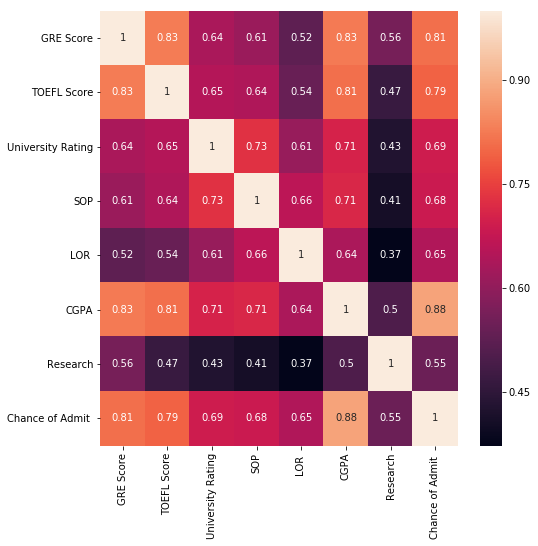

In [6]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(new_data.corr(),annot=True)

<font size="4">We can see that </font>**<font size="4">GRE Score,TOEFL Score,CGPA</font>** <font size="4">are highly correlated with </font>**<font size="4">Chance of Admit</font>**<br>
<font size="4">But we cannot ignore other variables as they are also having High Correlation(>0.5) too.</font>

**<font size="4">Barplots</font>**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


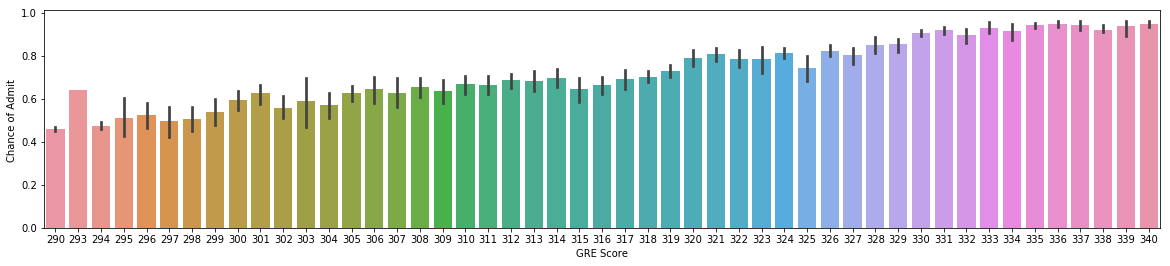

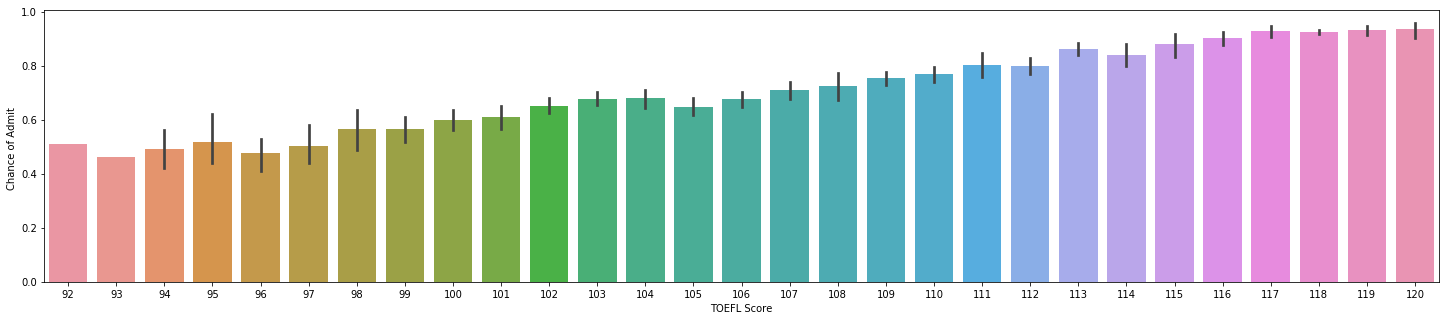

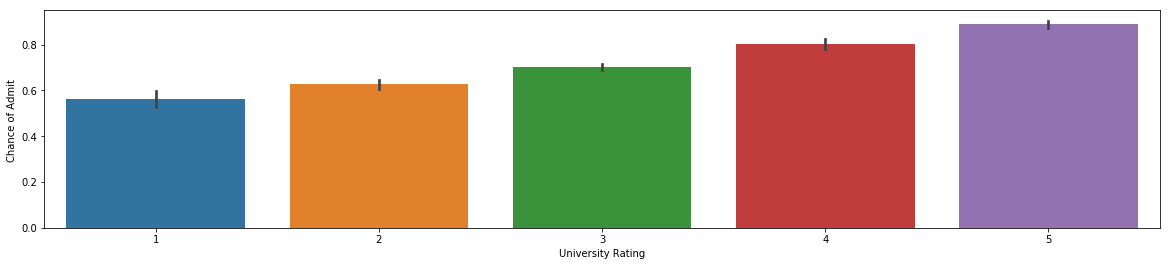

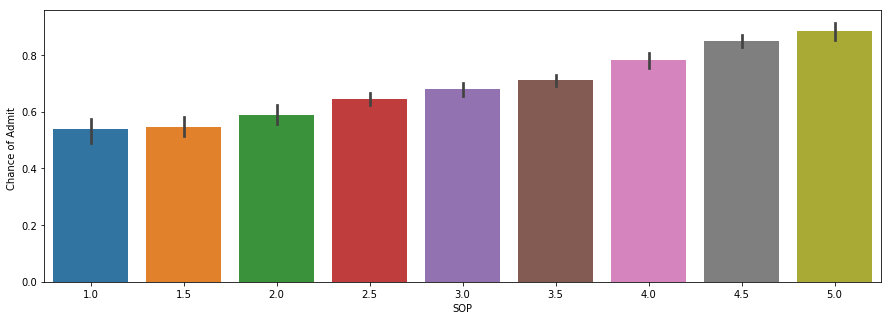

In [7]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=data)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=data)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=data)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=data)

<font size="4">Why </font>**<font size="4">PIE</font>** <font size="4">chart for only "Research" feature....????<br>
    **<font size="4">Answer</font>**<font size="4">- Pie chart, as explained by number of Data Visualizations Experts are confusing for features having more than three categories.</font>

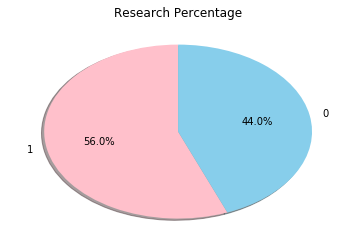

In [8]:
temp_series = new_data.Research.value_counts()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
labels = (np.array(temp_series.index))
# https://docs.scipy.org/doc/numpy-1.15.0/user/basics.creation.html
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.index.html
sizes = (np.array((temp_series/temp_series.sum())*100))
# calculating %ages
colors = ['Pink','SkyBlue']
plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
# https://www.commonlounge.com/discussion/9d6aac569e274dacbf90ed61534c076b#pie-chart
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
plt.title("Research Percentage")
plt.show()

**<font size="4">Countplots</font>**

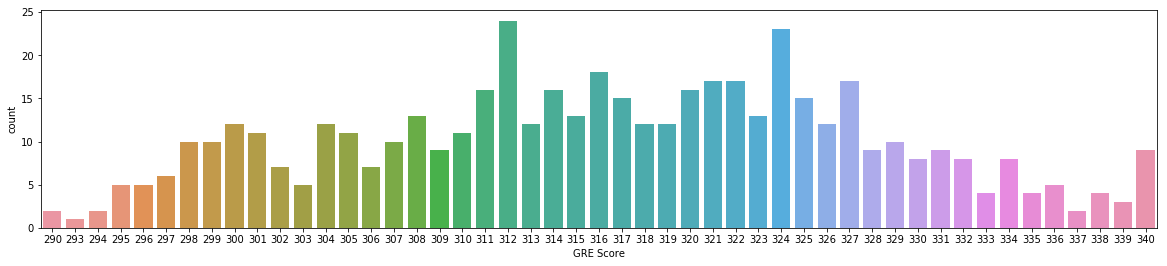

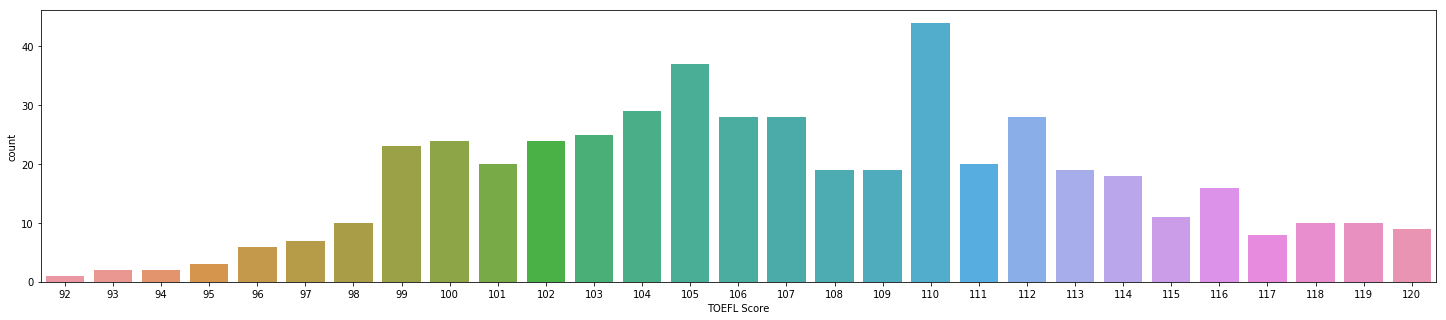

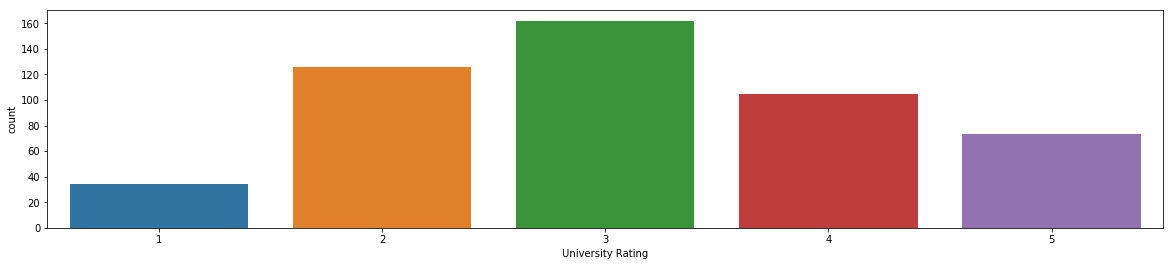

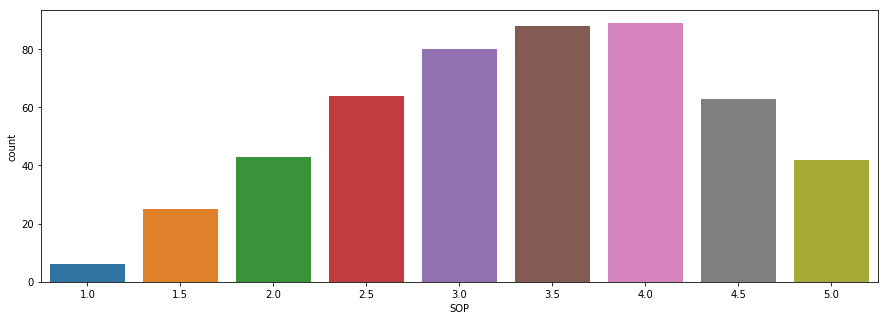

In [9]:
plt.subplots(figsize=(20,4))
sns.countplot(x="GRE Score",data=data)
plt.subplots(figsize=(25,5))
sns.countplot(x="TOEFL Score",data=data)
plt.subplots(figsize=(20,4))
sns.countplot(x="University Rating",data=data)
plt.subplots(figsize=(15,5))
sns.countplot(x="SOP",data=data)

**<font size="4">TABLEAU VIZ</font>**

<img src="https://imgur.com/7e9mpS7.jpg" width="1000px"/>

<font size="4">Now, this </font>*<font size="4">VIZ</font>* <font size="4">easily makes us understand that the problem is of </font>**<font size="4">LINEAR REGRESSION</font>**

**<font size="4">Seperating Independent and Dependent Variables</font>**

In [10]:
X=new_data.iloc[:,:7]
y=new_data["Chance of Admit "]

In [11]:
print(X.shape)
print(y.shape)
X.head()

(500, 7)
(500,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


**<font size="4">Splitting into Test and Training Sets</font>**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

**<font size="4">Importing and Fitting Linear Regression Model</font>**

In [13]:
from sklearn.linear_model import LinearRegression
#Linear Regression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred

array([0.62858489, 0.5630453 , 0.62610849, 0.52278247, 0.50451666,
       0.76156908, 0.90718643, 0.6458427 , 0.5415052 , 0.55657926,
       0.96425939, 0.93686676, 0.78819729, 0.74752677, 0.77994022,
       0.65097779, 0.77492475, 0.89655977, 0.66998219, 0.7928963 ,
       0.67387898, 0.65227253, 0.68469348, 0.60918057, 0.65299459,
       0.7319318 , 0.7324281 , 0.84755228, 0.68454267, 0.61497989,
       0.99610597, 0.68451526, 0.86773922, 0.8851996 , 0.55217387,
       0.72482522, 0.9660184 , 0.73846807, 0.96128332, 0.47471084,
       0.95160397, 0.83413252, 0.69629798, 0.72724642, 0.80494755,
       0.66388272, 0.74984219, 0.8369197 , 0.52067787, 0.83186697,
       0.83943883, 0.81875093, 0.58809134, 0.66652365, 0.56024635,
       0.79175916, 0.75478871, 0.97239619, 0.43578097, 0.58490642,
       0.62547018, 0.96412368, 0.82489705, 0.88263358, 0.63923411,
       0.64090726, 0.7174835 , 0.71048489, 0.56912616, 0.93739847,
       0.9005515 , 0.72556868, 0.88482532, 0.7595775 , 0.66992

**<font size="4">Checking Prediction Values</font>**

In [14]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score ",r2_score(y_pred,y_test))
print("mean_absolute_error ",mean_absolute_error(y_pred,y_test))

R2 score  0.82063139597419
mean_absolute_error  0.04040078799417789


**<font size="4">This Notebook will be updated soon, as we will walk through different algorithms of Regression on it.</font>**<br>
    <font size="4">Also one can FORK this notebook for further algorithms implementation.<br>
    Happy Learning :)
</font>